### Importação dos dados



In [13]:
import pandas as pd

# Carregar os dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Unir os dados
lojas = pd.concat([loja1, loja2, loja3, loja4])
lojas.reset_index(drop=True, inplace=True)

# Padronizar nomes das colunas (só para garantir)
lojas.columns = lojas.columns.str.lower().str.strip().str.replace(" ", "_")

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


<ipython-input-38-e3f7da2d16a6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=lojas, y=valores, palette="viridis")
<ipython-input-38-e3f7da2d16a6>:27: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


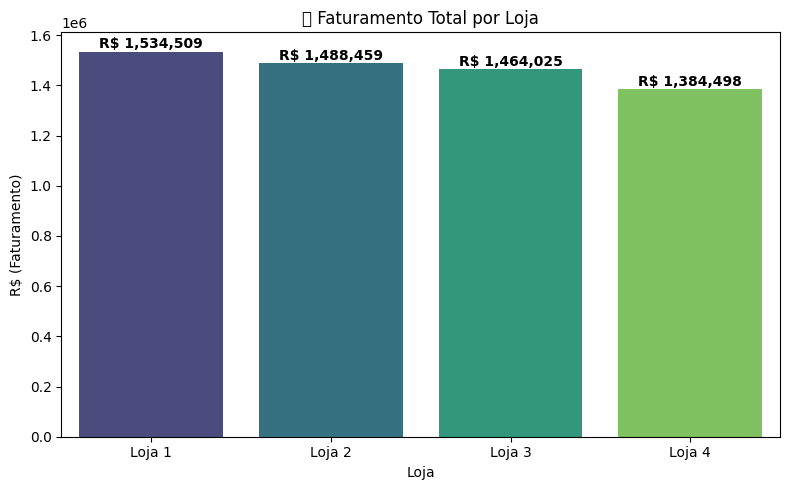

💰 Faturamento Total Geral: R$ 5871490.79


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Faturamento por loja
faturamento = {
    "Loja 1": loja1["Preço"].sum(),
    "Loja 2": loja2["Preço"].sum(),
    "Loja 3": loja3["Preço"].sum(),
    "Loja 4": loja4["Preço"].sum()
}

lojas = list(faturamento.keys())
valores = list(faturamento.values())
faturamento_total = sum(valores)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=lojas, y=valores, palette="viridis")
plt.title("💰 Faturamento Total por Loja")
plt.ylabel("R$ (Faturamento)")
plt.xlabel("Loja")

# Adicionar os valores nas barras
for i, valor in enumerate(valores):
    plt.text(i, valor + 1000, f"R$ {valor:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Exibir o faturamento total
print("💰 Faturamento Total Geral: R$", round(faturamento_total, 2))


# 2. Vendas por Categoria


📦 Vendas por Categoria:
 categoria_do_produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


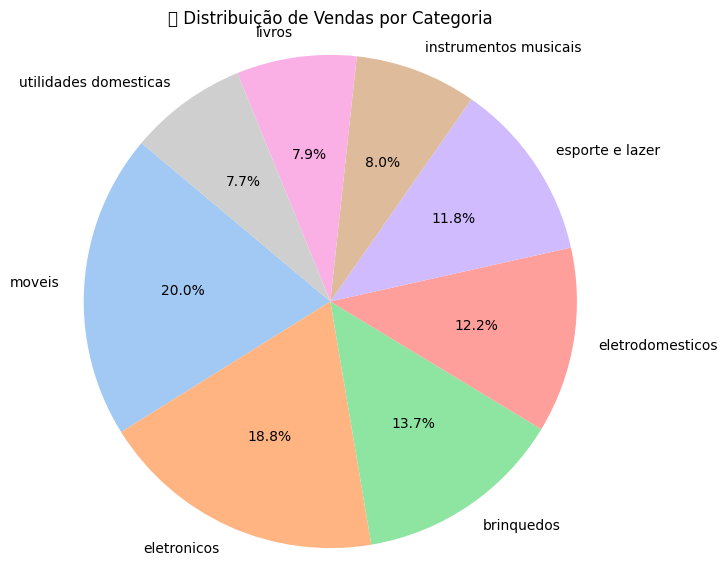

In [20]:
# prompt: vendas_categoria = lojas["categoria_do_produto"].value_counts()
# print("📦 Vendas por Categoria:\n", vendas_categoria)

vendas_categoria = lojas["categoria_do_produto"].value_counts()
print("📦 Vendas por Categoria:\n", vendas_categoria)

# Concatenar todas as lojas
todas_lojas = pd.concat([loja1, loja2, loja3, loja4])

# Agrupar por categoria
vendas_categoria = todas_lojas["Categoria do Produto"].value_counts()

# Gráfico
plt.figure(figsize=(7,7))
plt.pie(vendas_categoria, labels=vendas_categoria.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("📦 Distribuição de Vendas por Categoria")
plt.axis('equal')
plt.show()



# 3. Média de Avaliação das Lojas

⭐ Média de Avaliação das Lojas:
 Loja 1    3.98
Loja 2    4.04
Loja 3    4.05
Loja 4    4.00
dtype: float64


<ipython-input-21-7609e9f25e66>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avaliacoes.keys()), y=list(avaliacoes.values()), palette="magma")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


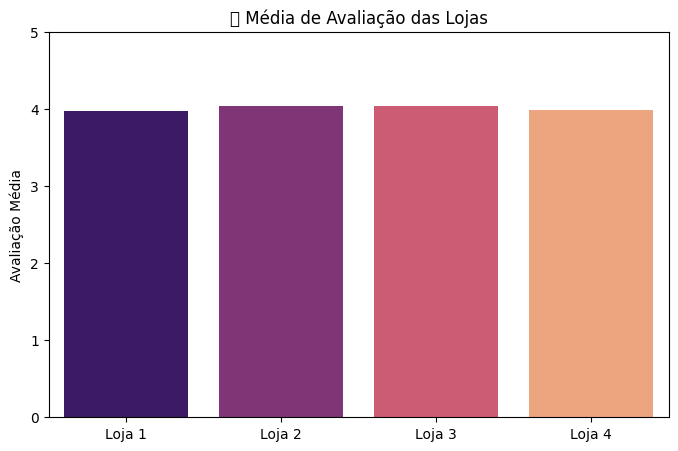

In [21]:
# prompt: avaliacoes = {
#     "Loja 1": loja1["Avaliação da compra"].mean(),
#     "Loja 2": loja2["Avaliação da compra"].mean(),
#     "Loja 3": loja3["Avaliação da compra"].mean(),
#     "Loja 4": loja4["Avaliação da compra"].mean()
# }
# media_avaliacoes = pd.Series(avaliacoes)
# print("⭐ Média de Avaliação das Lojas:\n", media_avaliacoes.round(2))

import pandas as pd
avaliacoes = {
    "Loja 1": loja1["Avaliação da compra"].mean(),
    "Loja 2": loja2["Avaliação da compra"].mean(),
    "Loja 3": loja3["Avaliação da compra"].mean(),
    "Loja 4": loja4["Avaliação da compra"].mean()
}
media_avaliacoes = pd.Series(avaliacoes)
print("⭐ Média de Avaliação das Lojas:\n", media_avaliacoes.round(2))


avaliacoes = {
    "Loja 1": loja1["Avaliação da compra"].mean(),
    "Loja 2": loja2["Avaliação da compra"].mean(),
    "Loja 3": loja3["Avaliação da compra"].mean(),
    "Loja 4": loja4["Avaliação da compra"].mean()
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(avaliacoes.keys()), y=list(avaliacoes.values()), palette="magma")
plt.title("⭐ Média de Avaliação das Lojas")
plt.ylabel("Avaliação Média")
plt.ylim(0,5)
plt.show()


# 4. Produtos Mais e Menos Vendidos

🔥 Produto mais vendido: Cômoda
❄️ Produto menos vendido: Celular ABXY


<ipython-input-22-dd2a067a6afd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=produtos_mais_vendidos.values, y=produtos_mais_vendidos.index, palette="crest")
<ipython-input-22-dd2a067a6afd>:19: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


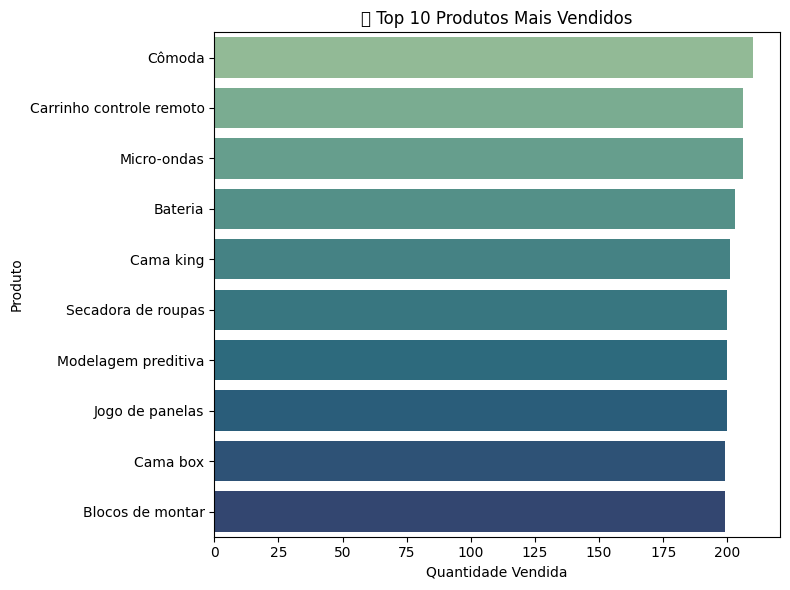

In [22]:
# prompt: produtos = lojas["produto"].value_counts()
# print("🔥 Produto mais vendido:", produtos.idxmax())
# print("❄️ Produto menos vendido:", produtos.idxmin())

produtos = lojas["produto"].value_counts()
print("🔥 Produto mais vendido:", produtos.idxmax())
print("❄️ Produto menos vendido:", produtos.idxmin())



# Top 10 produtos mais vendidos
produtos_mais_vendidos = todas_lojas["Produto"].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=produtos_mais_vendidos.values, y=produtos_mais_vendidos.index, palette="crest")
plt.title("🔥 Top 10 Produtos Mais Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


🚚 Frete Médio por Loja:
 Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
dtype: float64


<ipython-input-23-92ff87617294>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frete_medio.keys()), y=list(frete_medio.values()), palette="Blues")
<ipython-input-23-92ff87617294>:33: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


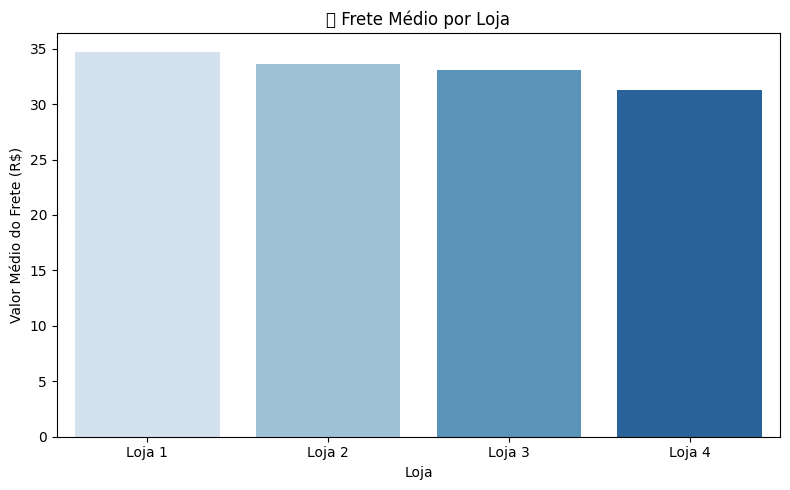

In [23]:
# prompt: frete_medio = {
#     "Loja 1": loja1["Frete"].mean(),
#     "Loja 2": loja2["Frete"].mean(),
#     "Loja 3": loja3["Frete"].mean(),
#     "Loja 4": loja4["Frete"].mean()
# }
# frete_medio_df = pd.Series(frete_medio)
# print("🚚 Frete Médio por Loja:\n", frete_medio_df.round(2))

import pandas as pd
frete_medio = {
    "Loja 1": loja1["Frete"].mean(),
    "Loja 2": loja2["Frete"].mean(),
    "Loja 3": loja3["Frete"].mean(),
    "Loja 4": loja4["Frete"].mean()
}
frete_medio_df = pd.Series(frete_medio)
print("🚚 Frete Médio por Loja:\n", frete_medio_df.round(2))


frete_medio = {
    "Loja 1": loja1["Frete"].mean(),
    "Loja 2": loja2["Frete"].mean(),
    "Loja 3": loja3["Frete"].mean(),
    "Loja 4": loja4["Frete"].mean()
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(frete_medio.keys()), y=list(frete_medio.values()), palette="Blues")
plt.title("🚚 Frete Médio por Loja")
plt.ylabel("Valor Médio do Frete (R$)")
plt.xlabel("Loja")
plt.tight_layout()
plt.show()


## 📈 Relatório de Análise de Vendas – Lojas 1 a 4

👩‍💻 Projeto: Análise de Dados de Vendas

Fonte dos dados: Alura Challenge - Data Science

##### 🔹 1. Introdução

Este relatório apresenta uma análise exploratória dos dados de vendas de quatro lojas virtuais. A análise tem como objetivo identificar padrões de consumo, produtos mais vendidos, desempenho das categorias, avaliação dos clientes e custos médios de frete.

##### 🔹 2. Base de Dados
As bases foram unificadas a partir de quatro arquivos CSV referentes a cada loja:

##### 🔹 3. Faturamento Total 💰
💰 Faturamento Total: R$ 5871490.79

Loja 1 1.534,509

Loja 2 1.488,459

Loja 3 1.464,025

Loja 4 1.384,498

##### 🔹 4. Vendas por Categoria 📦

 **categoria_do_produto**

moveis                   1886

eletronicos              1772

brinquedos               1290

eletrodomesticos         1149

esporte e lazer          1113

instrumentos musicais     753

livros                    742

utilidades domesticas     730


#####🔹 5. Média de Avaliação das Lojas ⭐

Loja 1    3.98

Loja 2    4.04

Loja 3    4.05

Loja 4    4.00

A Loja 2 teve a melhor avaliação média entre os clientes.

#####🔹 6. Produtos Mais e Menos Vendidos 🔥❄️

🔥 Produto mais vendido: Cômoda

❄️ Produto menos vendido: Celular ABXY

##### 🔹 7. Frete Médio por Loja 🚚

Loja 1    34.69

Loja 2    33.62

Loja 3    33.07

Loja 4    31.28

##### 🔹 8. Conclusão

A análise revela insights importantes como:

O faturamento total: R$ 5871490.79

A categoria mais vendida foi moveis.

A loja com melhor desempenho em avaliações foi a loja 2.

O produto mais popular foi Cômoda.

Há uma variação significativa no custo médio de frete entre as lojas.

✅ Recomendação

💼 Vender a Loja 4:

Ela apresenta o menor desempenho financeiro e não se destaca em avaliação nem categoria de produto. Embora tenha o frete mais barato, isso não compensou em volume de vendas nem em satisfação do cliente.